In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
from scipy import integrate
import scipy.interpolate as si
from pylab import *
import scipy
import romberg as r

## Question 1
Transform the integral to the dimensionless variable u = r/a.

In [2]:
def integrand(u):
    f=0
    if (u<1):
        f=2*(sp.jv(3,2.7*u)**2)*u
    if (u>=1):
        f=(2*abs(sp.jv(3,2.7)/sp.kv(3,1.2))**2)*((sp.kv(3,1.2*u))**2)*u
    return f

## Question 2
Graph the integrand in Python from 0 to ∞ (use a semi-log plot, since the function
amplitudes vary widely, but the function is positive everywhere). Study its char-
acteristics, since those will be required to design your algorithm. Is the function
continuous? Is it smooth everywhere?

Text(0, 0.5, 'Integrand Values')

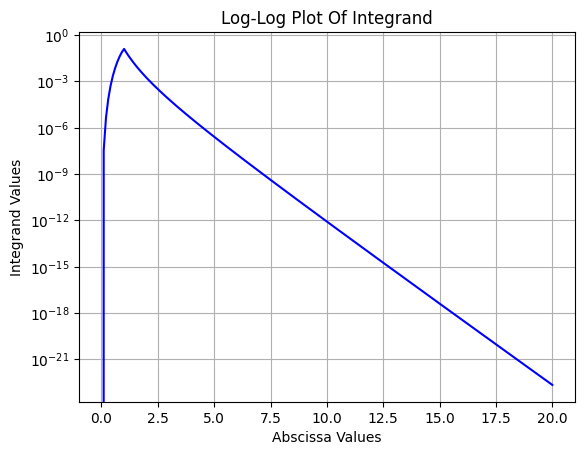

In [18]:
yval=[]
# xval = np.logspace(-5, 3, 2000)
xval = np.linspace(0, 20, 200)

for i in xval:
    yval.append(integrand(i))

plt.clf()
plt.semilogy(xval,yval,'b')
plt.grid()
plt.title("Log-Log Plot Of Integrand")
plt.xlabel("Abscissa Values")
plt.ylabel("Integrand Values")

## Question 4
Use Python’s built-in integrator, quad, found in scipy.integrate to do the
integration. Verify the given solution. How many calls were required? (Integrate
from 0 to a).

In [4]:
def exact_integral():
    return sp.jv(3,2.7)**2-sp.jv(4,2.7)*sp.jv(2,2.7)+abs(sp.jv(3,2.7)/sp.kv(3,1.2))**2*(sp.kv(4,1.2)*sp.kv(2,1.2)-sp.kv(3,1.2)**2)

In [22]:
quad_calc = integrate.quad(integrand,0,16,full_output=1)
print(integrate.quad(integrand, 16, np.inf, full_output=0))
numeric_val = quad_calc[0]
exact_val = exact_integral()
n_eval = quad_calc[2]['neval']

print('  Integral Value From Quad Fn.: ', numeric_val)
print('          Exact Integral Value: ', exact_val)
print(' Error in Integral Calculation: ', numeric_val - exact_val)
print('No. of Fn Evalutations by Quad: ', n_eval)

(1.4935425342674354e-19, 1.9654280961900624e-21)
  Integral Value From Quad Fn.:  0.04603886027986451
          Exact Integral Value:  0.04603886027986452
 Error in Integral Calculation:  -1.3877787807814457e-17
No. of Fn Evalutations by Quad:  189


## Question 5
Use the trapezoidal method and obtain the integral. How does the error scale with
h? 
* Define a global variable 'count' to keep track of how many calls have been
made
* Plot the error (defined as difference between the numerical integral and the
theoretical value) on the y axis and number of calls on the x axis. What sort
of plot should you use?
* What is the trend? How good is the trapzoidal algorithm?

In [23]:
count = 0
def integrand(u):
    global count
    count += 1
    f=0
    if (u<1):
        f=2*(sp.jv(3,2.7*u)**2)*u
    if (u>=1):
        f=(2*abs(sp.jv(3,2.7)/sp.kv(3,1.2))**2)*((sp.kv(3,1.2*u))**2)*u
    return f

In [24]:
s = 0
counts = []
errs = []

for i in range(1, 20):
    count = 0
    s = r.trapzd(integrand, 0, 20, s, i)
    errs.append(abs(s-exact_integral()))
    counts.append(count)
    print('N: ', i, ', Calculated Value: ', s, ', Error: ', s-exact_integral())

N:  1 , Calculated Value:  2.2497765762474784e-22 , Error:  -0.04603886027986452
N:  2 , Calculated Value:  8.383325610856897e-12 , Error:  -0.04603886027148119
N:  3 , Calculated Value:  1.289283322902078e-06 , Error:  -0.04603757099654162
N:  4 , Calculated Value:  0.0007879772443615151 , Error:  -0.04525088303550301
N:  5 , Calculated Value:  0.04475132804888183 , Error:  -0.0012875322309826923
N:  6 , Calculated Value:  0.029521687183219097 , Error:  -0.016517173096645424
N:  7 , Calculated Value:  0.04689736641729698 , Error:  0.0008585061374324562
N:  8 , Calculated Value:  0.04486889125557139 , Error:  -0.0011699690242931299
N:  9 , Calculated Value:  0.04605621928211479 , Error:  1.7359002250270927e-05
N:  10 , Calculated Value:  0.04596159457142609 , Error:  -7.726570843843289e-05
N:  11 , Calculated Value:  0.046040763026165415 , Error:  1.9027463008941536e-06
N:  12 , Calculated Value:  0.04603407675471921 , Error:  -4.783525145310441e-06
N:  13 , Calculated Value:  0.046038

Text(0, 0.5, 'Error in Trapezoidal Method')

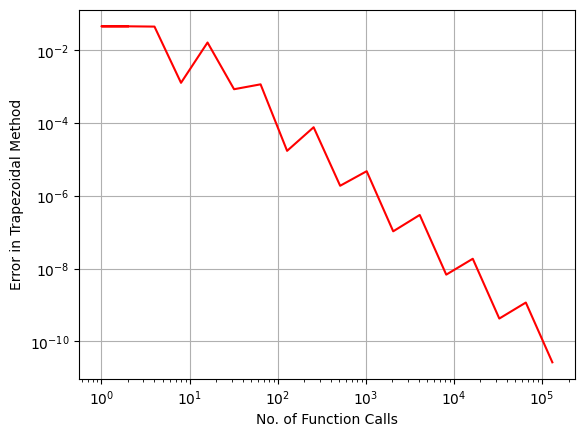

In [8]:
plt.clf()
plt.loglog(counts,errs,'r')
plt.grid()
plt.xlabel("No. of Function Calls")
plt.ylabel("Error in Trapezoidal Method")

## Question 6
Use the romberg module’s qromb to investigate Romberg integration. Integrate
the entire integral from 0 to ∞. How does the error scale with number of calls?
Plot the trend.

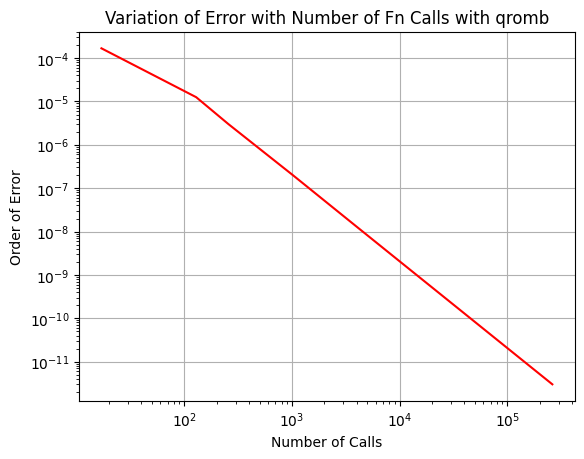

In [25]:
errors=[]
calls=[]
values=[]

for i in range(-1,-11,-1):
    values.append(r.qromb(integrand,0,10,10**i)[0])
    errors.append(abs(r.qromb(integrand,0,10,10**i)[1]))
    calls.append(r.qromb(integrand,0,10,10**i)[2])

plt.clf()
plt.title('Variation of Error with Number of Fn Calls with qromb')
plt.loglog(calls,errors,'r')
plt.xlabel("Number of Calls")
plt.ylabel("Order of Error")
plt.grid()

## Question 7
Split the romberg integrals into (0, 1) and (1, ∞). Repeat the study. Explain the
difference in the number of calls required to achieve a given accuracy.

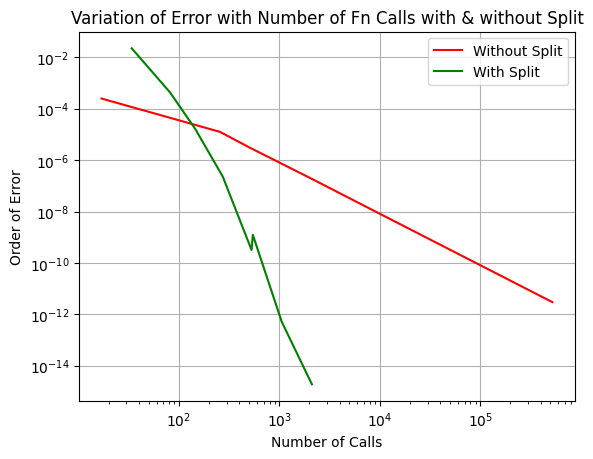

In [10]:
spl_errors=[]
spl_calls=[]
spl_values=[]

for i in range(-1,-11,-1):
    count=0
    s1=r.qromb(integrand,0,1,10**i)
    s2=r.qromb(integrand,1,20,10**i)
    spl_values.append(s1[0]+s2[0])
    spl_errors.append(abs(s1[0]+s2[0]-exact_integral()))
    spl_calls.append(s1[2]+s2[2])

plt.clf()
plt.title('Variation of Error with Number of Fn Calls with & without Split')
plt.loglog(calls,errors, 'r', label='Without Split')
plt.loglog(spl_calls, spl_errors, 'g', label='With Split')
plt.xlabel("Number of Calls")
plt.ylabel("Order of Error")
plt.grid()
plt.legend()

### Question 8
Write a python program that implements qromb using trapzd and polint
from the romberg module.

In [11]:
def py_qromb(fn, a, b):
    integral, err = 0, 0
    k = 10
    xx, yy = [], []
    for i in range(1,k+1):
        integral=r.trapzd(fn,a,b,integral,i)
        xx.append(((b-a)/(2**(i-1)))**2) #because integral related to h**2 and not h
        yy.append(integral)
    integral, err = r.polint(xx,yy,0)
    return (integral, err)

### Question 9
Vary the order of qromb and see how the number of calls scales for a fixed error
of 10−8 .

In [29]:
orders = [i for i in range(3, 21)]
calls = []

In [30]:
for order in orders:
    s = r.qromb(integrand, 0, 20, 1e-8, order)
    calls.append(s[2])

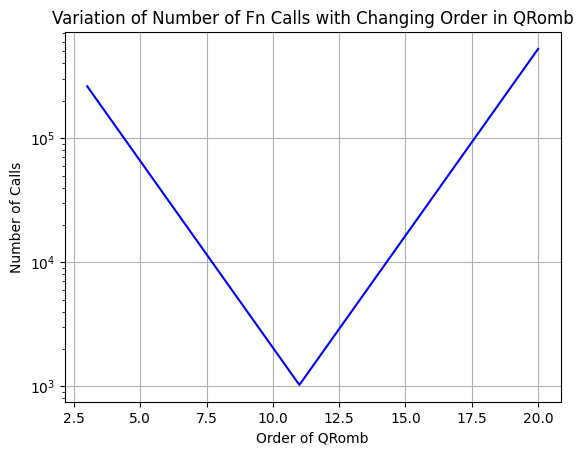

In [31]:
plt.clf()
plt.title('Variation of Number of Fn Calls with Changing Order in QRomb')
plt.semilogy(orders,calls, 'b')
plt.xlabel("Order of QRomb")
plt.ylabel("Number of Calls")
plt.grid()

### Question 10
Use spline integration to improve over trapezoidal integration. What scaling do
you get (plot it!)? Can you explain why? Hint: Look at the spline interpolated
function near r = 1.

In [70]:
x = np.logspace(-3, 2.16, 2000)
y = [integrand(i) for i in x]
a, b = 0, 20

In [71]:
tck=si.splrep(x,y) # x,y contains table of data
xx = np.logspace(-3, 2.16, 10000)
yy = [si.splev(i, tck) for i in xx]

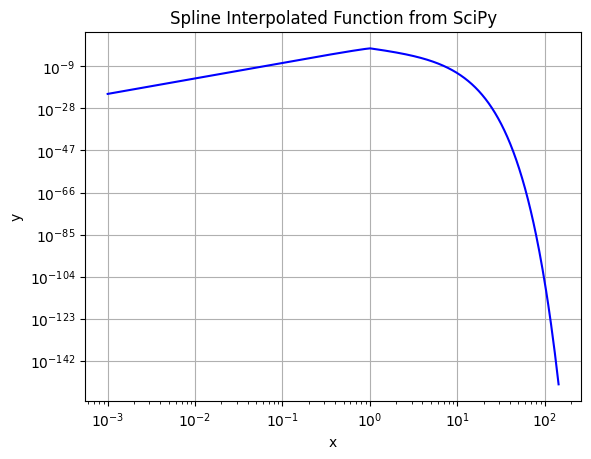

In [72]:
plt.clf()
plt.title('Spline Interpolated Function from SciPy')
plt.loglog(xx,yy, 'b')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [73]:
I=si.splint(a,b,tck)
print(I)
print(exact_val - I)

0.04603888627594987
-2.5996085346868814e-08
